In [92]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

arr = np.load('000a6d98b0e4.npy')
print(arr.shape)

(6, 273, 256)


In [93]:
def concat_cadence(filename, save_path):
    arr = np.load(filename)
    concat_arr = arr[0]
    for i in range (1, 6):
        #print(concat_arr.shape)
        concat_arr = np.concatenate((concat_arr, arr[i]),axis=0)
    matplotlib.image.imsave(save_path, concat_arr)
    return concat_arr

In [95]:
from glob import glob

Data_dir=np.array(glob(r"D:\data SETI\test\*"))
#%load_ext memory_profiler
#%memit 

i=0
for file in Data_dir[i:i+40000]:
    #Define the filename as is, "name" refers to the JPG, and is split off into the number itself. 
    filename,name = file,file.split('\\')[-1].split('.')[0]
    save_path = r'D:\data SETI\test_img\\' + name + '.png'
    concat_cadence(filename, save_path)

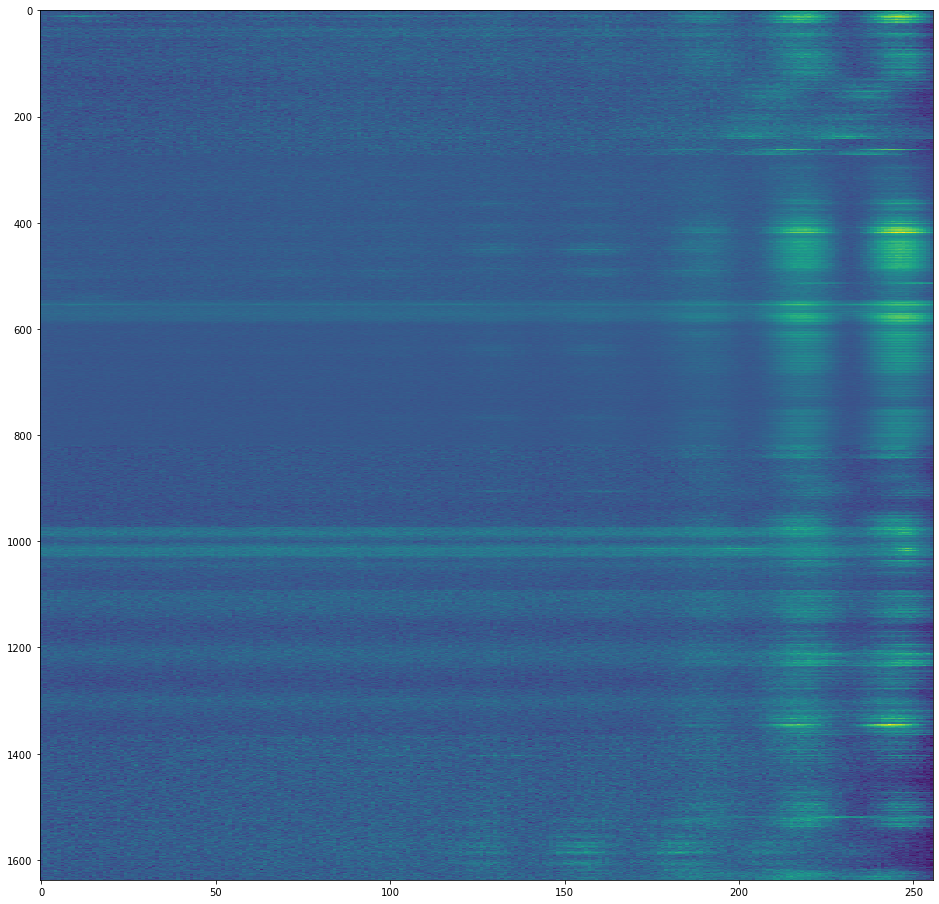

In [88]:
fig = plt.figure(figsize=(16, 16))
full_arr = concat_cadence(arr)
plt.imshow(full_arr.astype(float), interpolation='nearest', aspect='auto')
plt.show()

ValueError: too many values to unpack (expected 2)

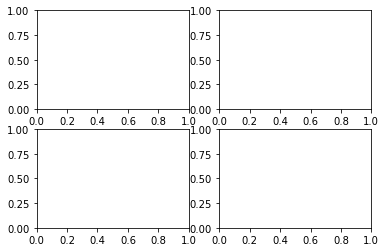

In [90]:
from matplotlib import colors as mcolors
#проверка нормализаций
for i in range(6):
    data = arr
    # norm = mcolors.LogNorm(arr[i].mean() + 0.5 * arr[i].std(), arr[i].max())
    gammas = [0.8, 0.5, 0.3]
    fig, axs = plt.subplots(nrows=2, ncols=2)
    
    for ax, gamma in zip(axs.flat[1:], gammas):
        imgplot = ax.hist2d(data[:, 0], data[:, 1], norm=mcolors.PowerNorm(gamma))

    fig.tight_layout()

    plt.show()

In [ ]:
#проверка маски по цветам
cdict = {'red': ((0.0, 0.0, 0.0),
                 (0.5, 1.0, 0.7),
                 (1.0, 1.0, 1.0)),
         'green': ((0.0, 0.0, 0.0),
                   (0.5, 1.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (0.5, 1.0, 0.0),
                  (1.0, 0.5, 1.0))}

fig = plt.figure()
for i in range(6):
    my_cmap = matplotlib.colors.LinearSegmentedColormap('', cdict,256)
    ax = fig.add_subplot(3, 3, i + 1)
    imgplot = (plt.pcolor(arr[i], cmap=my_cmap))
plt.show()

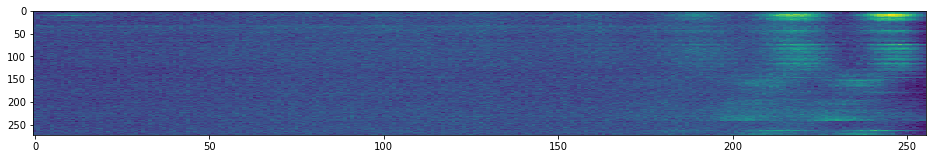

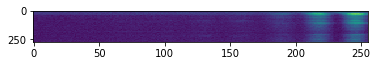

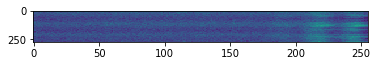

In [29]:
fig = plt.figure(figsize=(16, 16))
#arr = np.load('/home/timur/Documents/Projects/SETI/train/0/0a0afbe05dc8.npy')
for i in range(0, 6, 2):
    plt.subplot(6, 1, i + 1)
    plt.imshow(arr[i].astype(float), interpolation='nearest', aspect='auto')
    plt.savefig(f'jopa{i+1}.png', dpi = 150)
    plt.show()

In [229]:
import pandas as pd
import os

data = pd.read_csv(r'D:\data SETI\train_labels.csv')
#print(data[data.columns[0]].to_list())
#print(data[0:1])
seq_pred = []
true_name = []
for i in os.listdir(r'D:\data SETI\train_img'):
    if i[:-4] in data[data.columns[0]].to_list():
        idx = data[data.columns[0]].to_list().index(i[:-4])
        if data[data.columns[1]].to_list()[idx] == 1:
            true_name.append(data[data.columns[0]].to_list()[idx])
            seq_pred.append(data[data.columns[1]].to_list()[idx])
#print(true_name)
#print(seq_pred)
# zero, one = 0, 0
# for i in seq_idx:
#     if i == 1:
#         one += 1
#     else:
#         zero += 1
# print(one/zero, 'lolo', (one, zero))

In [219]:
print('true_name ------ ', len(true_name))
print('example name -----', true_name[0])
print('\n')
#print(len(seq_pred))
file_path = []
for name in true_name:
    file_path.append('D:\\data SETI\\train_img\\' + name + '.png')
print('file_path ------', len(file_path))
print('example file_path -----', file_path[0])

true_name ------  4694
example name ----- 001c619bdf53


file_path ------ 4694
example file_path ----- D:\data SETI\train_img\001c619bdf53.png


In [224]:
import shutil
count = 0
for i in range(0, len(file_path)):
    if true_name[i][:1] == 0: #true_name[i+1][:1]
        count += 1
    
    shutil.copy2(file_path[i], 'D:\\data SETI\\train_img\\0\\')
    if count >= 30:
        break

In [227]:
#доставать значения из репозитория
from glob import glob

Data_dir=np.array(glob(r"D:\data SETI\train_img\0\*"))
Data_dir = Data_dir[4000]
name = Data_dir.split('\\')[-1].split('.')[0]
print(name)

dae4ed8cf390
